In [1]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
import pandas as pd

<h2>For images with hair</h2>

In [2]:
BASE_PATH = '../Qatar_AI/images/'
hair_images =['ISIC_0009942','ISIC_0009979','ISIC_0010176','ISIC_0010203','ISIC_0011124','ISIC_0011200','ISIC_0011357','ISIC_0011301','ISIC_0011326','ISIC_0011343']
without_hair_images = ['ISIC_0000543','ISIC_0009919','ISIC_0009960','ISIC_0010043','ISIC_0011214','ISIC_0011295']

[]

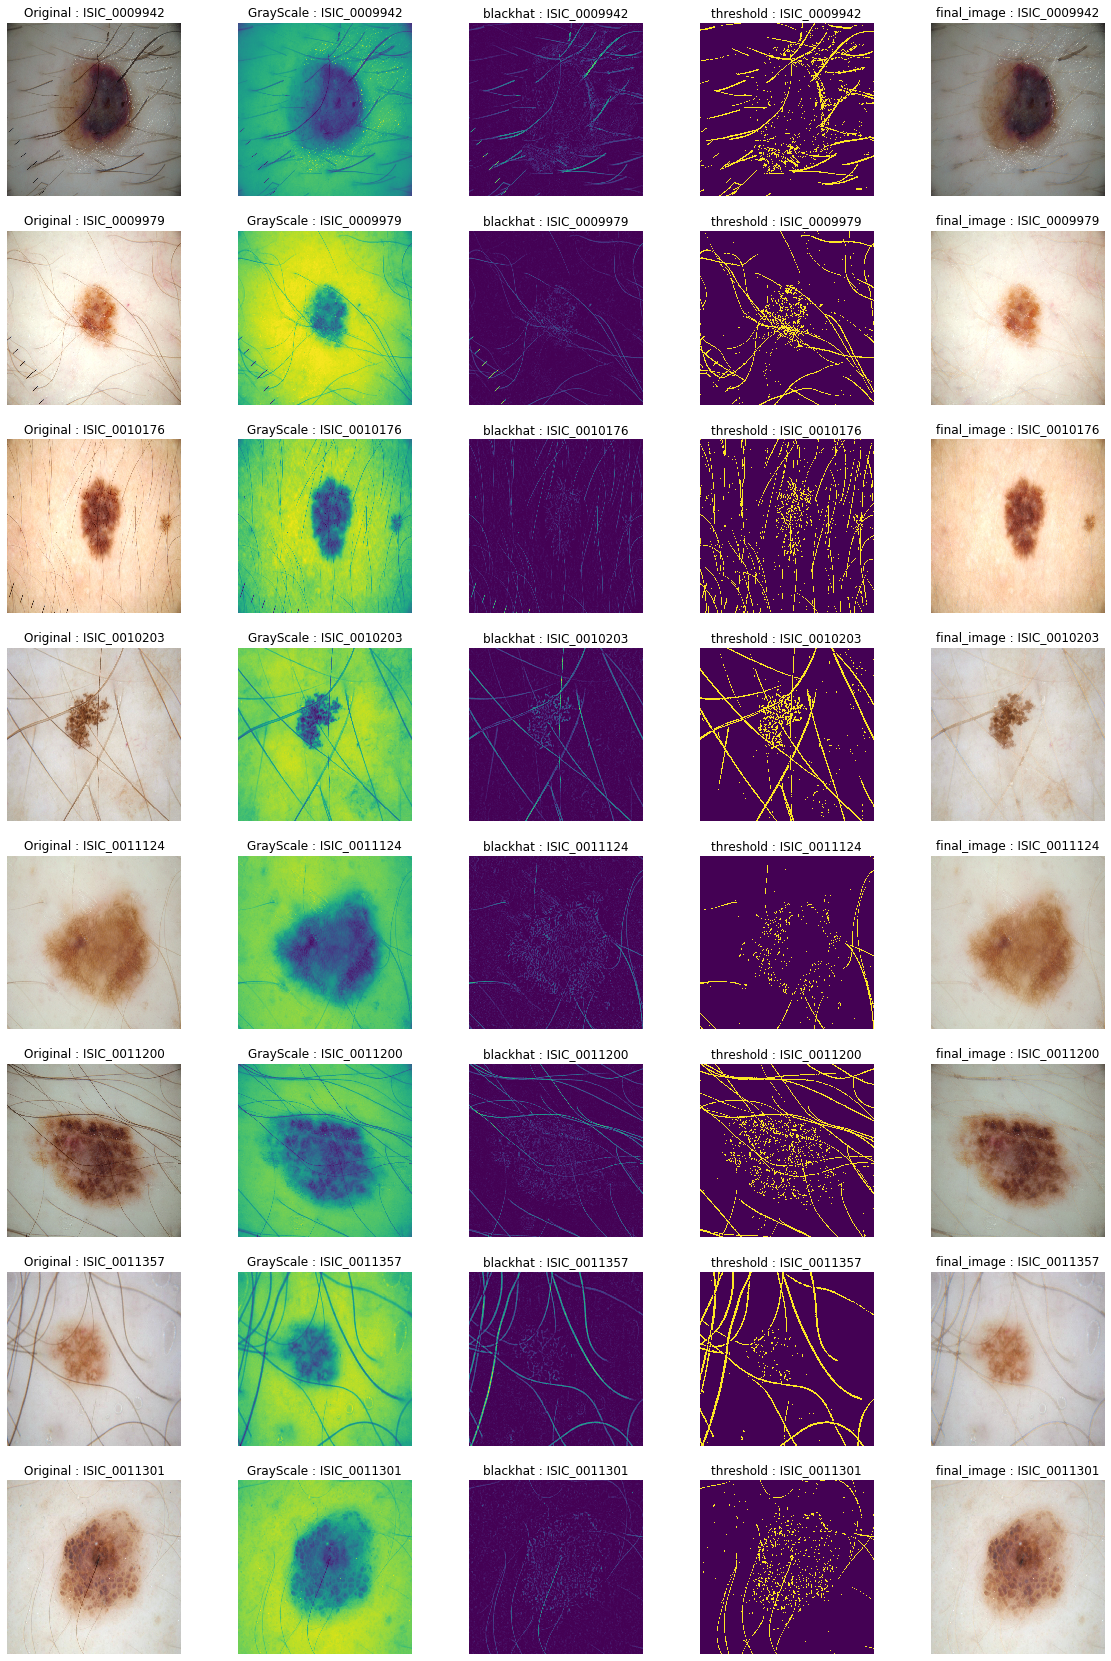

In [4]:
l = len(hair_images[:8])

fig = plt.figure(figsize=(20,30))

for i,image_name in enumerate(hair_images[:8]):
    
    
    image = cv2.imread(BASE_PATH + '/jpeg/train/' + image_name + '.jpg')
    image_resize = cv2.resize(image,(1024,1024))
    plt.subplot(l, 5, (i*5)+1)
    # Convert the original image to grayscale
    plt.imshow(cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Original : '+ image_name)
    
    grayScale = cv2.cvtColor(image_resize, cv2.COLOR_RGB2GRAY)
    plt.subplot(l, 5, (i*5)+2)
    plt.imshow(grayScale)
    plt.axis('off')
    plt.title('GrayScale : '+ image_name)
    
    # Kernel for the morphological filtering
    kernel = cv2.getStructuringElement(1,(17,17))
    
    # Perform the blackHat filtering on the grayscale image to find the hair countours
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
    plt.subplot(l, 5, (i*5)+3)
    plt.imshow(blackhat)
    plt.axis('off')
    plt.title('blackhat : '+ image_name)
    
    # intensify the hair countours in preparation for the inpainting 
    ret,threshold = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
    plt.subplot(l, 5, (i*5)+4)
    plt.imshow(threshold)
    plt.axis('off')
    plt.title('threshold : '+ image_name)
    
    # inpaint the original image depending on the mask
    final_image = cv2.inpaint(image_resize,threshold,1,cv2.INPAINT_TELEA)
    plt.subplot(l, 5, (i*5)+5)
    plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('final_image : '+ image_name)
       
plt.plot()

In [5]:
def hair_remove(image):
    # convert image to grayScale
    grayScale = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # kernel for morphologyEx
    kernel = cv2.getStructuringElement(1,(17,17))
    
    # apply MORPH_BLACKHAT to grayScale image
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
    
    # apply thresholding to blackhat
    _,threshold = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
    
    # inpaint with original image and threshold image
    final_image = cv2.inpaint(image,threshold,1,cv2.INPAINT_TELEA)
    
    return final_image

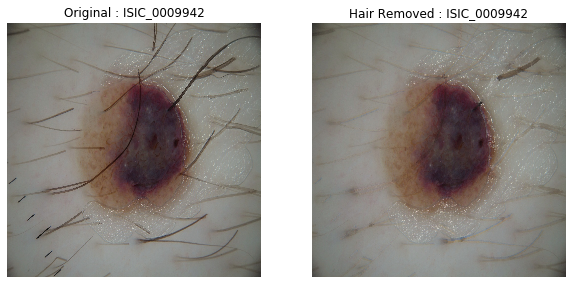

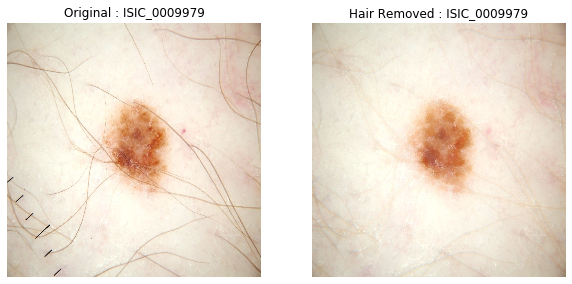

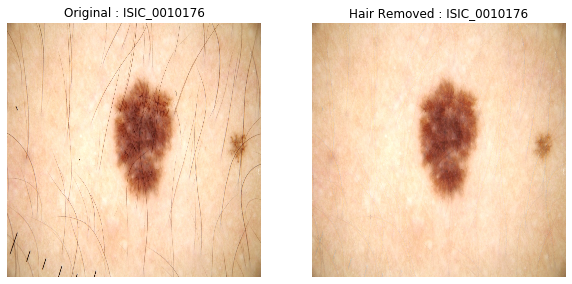

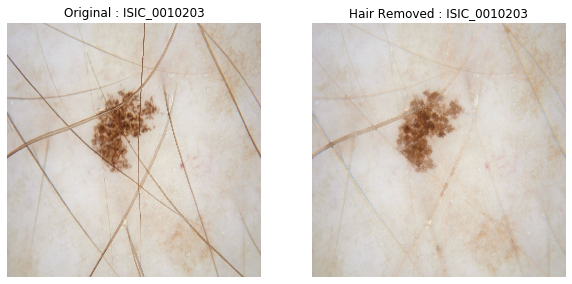

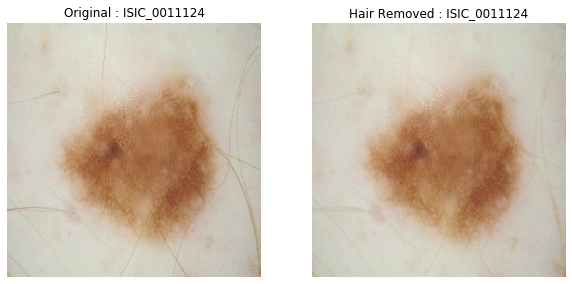

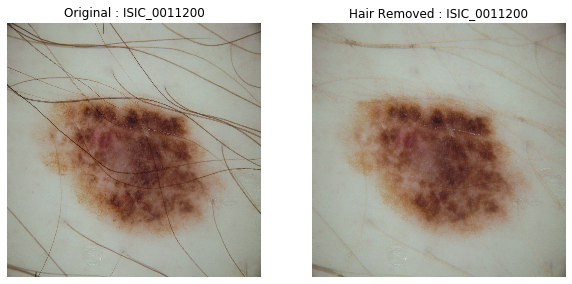

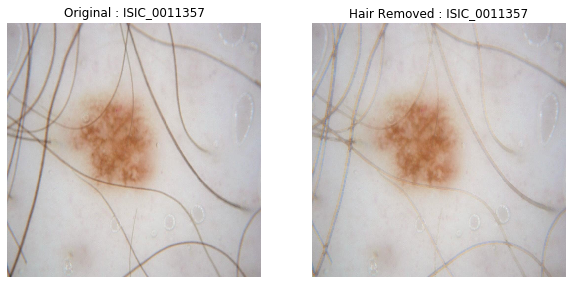

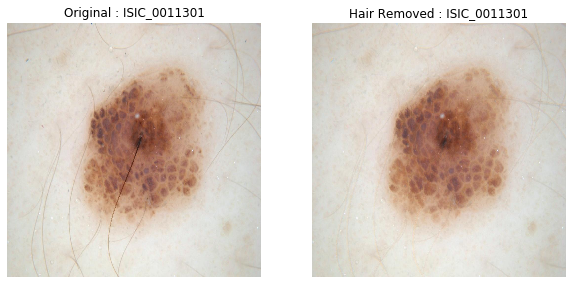

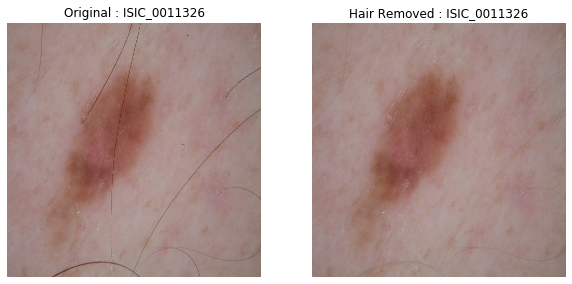

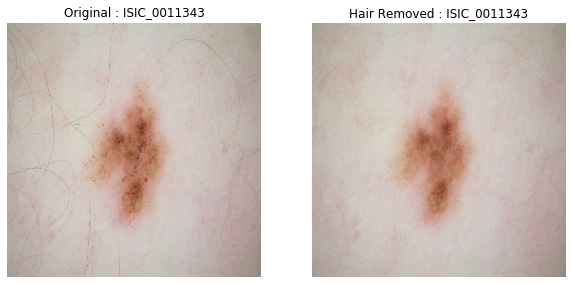

In [6]:
for i,image_name in enumerate(hair_images):
    
    fig = plt.figure(figsize=(10,5))
    
    image = cv2.imread(BASE_PATH + '/jpeg/train/' + image_name + '.jpg')
    image_resize = cv2.resize(image,(1024,1024))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Original : '+ image_name)
    
    final_image = hair_remove(image_resize)
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Hair Removed : '+ image_name)
    
    plt.plot()

<h2>For images without hair</h2>

[]

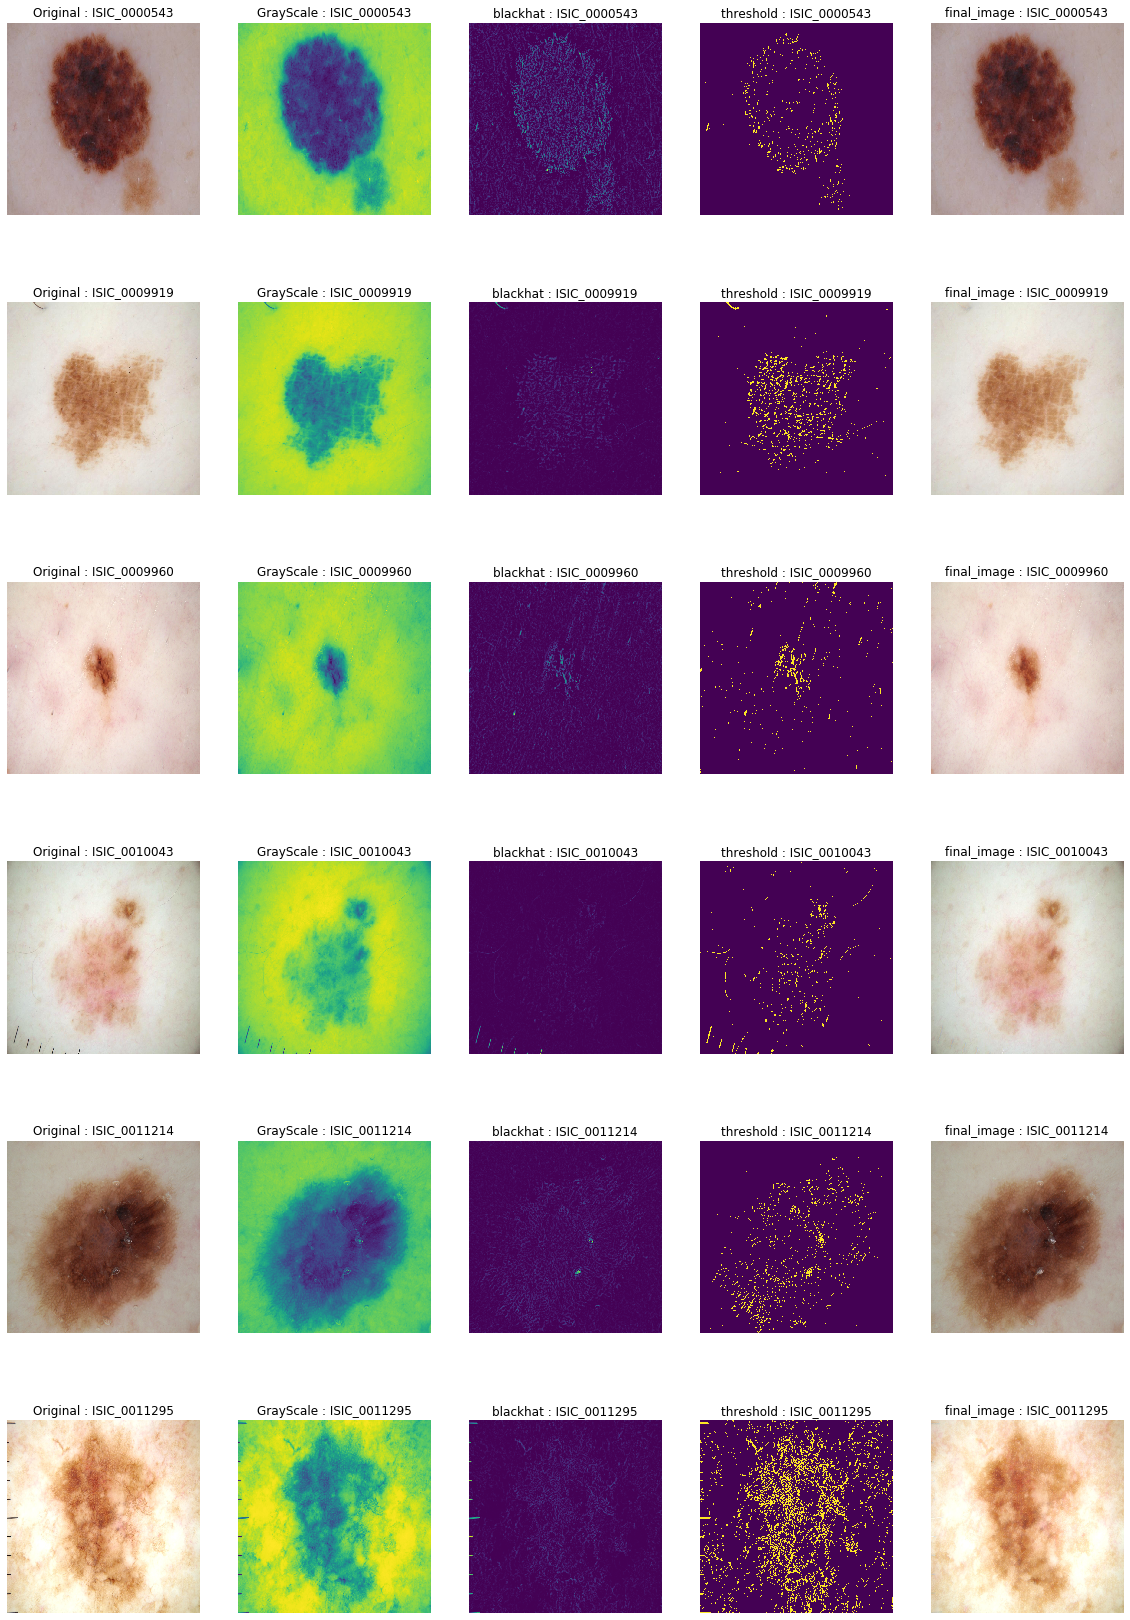

In [7]:
l = len(without_hair_images)

fig = plt.figure(figsize=(20,30))

for i,image_name in enumerate(without_hair_images):
    
    
    image = cv2.imread(BASE_PATH + '/jpeg/train/' + image_name + '.jpg')
    image_resize = cv2.resize(image,(1024,1024))
    plt.subplot(l, 5, (i*5)+1)
    # Convert the original image to grayscale
    plt.imshow(cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Original : '+ image_name)
    
    grayScale = cv2.cvtColor(image_resize, cv2.COLOR_RGB2GRAY)
    plt.subplot(l, 5, (i*5)+2)
    plt.imshow(grayScale)
    plt.axis('off')
    plt.title('GrayScale : '+ image_name)
    
    # Kernel for the morphological filtering
    kernel = cv2.getStructuringElement(1,(17,17))
    
    # Perform the blackHat filtering on the grayscale image to find the hair countours
    blackhat = cv2.morphologyEx(grayScale, cv2.MORPH_BLACKHAT, kernel)
    plt.subplot(l, 5, (i*5)+3)
    plt.imshow(blackhat)
    plt.axis('off')
    plt.title('blackhat : '+ image_name)
    
    # intensify the hair countours in preparation for the inpainting 
    ret,threshold = cv2.threshold(blackhat,10,255,cv2.THRESH_BINARY)
    plt.subplot(l, 5, (i*5)+4)
    plt.imshow(threshold)
    plt.axis('off')
    plt.title('threshold : '+ image_name)
    
    # inpaint the original image depending on the mask
    final_image = cv2.inpaint(image_resize,threshold,1,cv2.INPAINT_TELEA)
    plt.subplot(l, 5, (i*5)+5)
    plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('final_image : '+ image_name)
       
plt.plot()

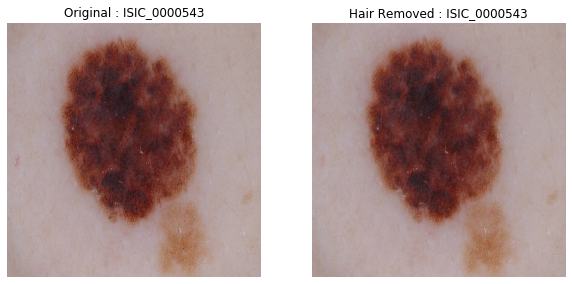

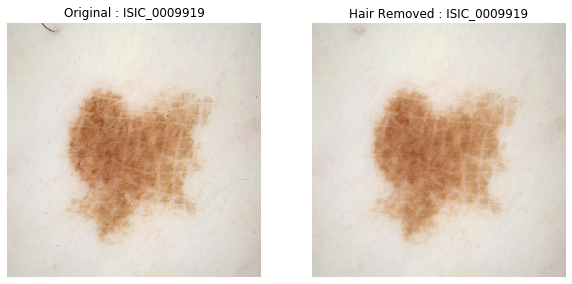

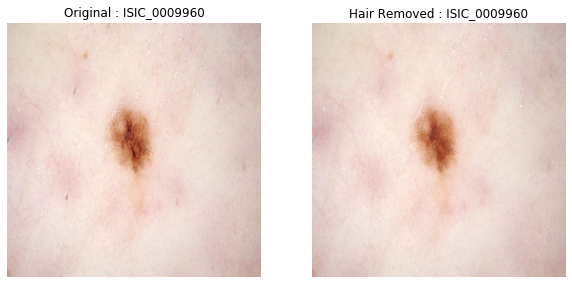

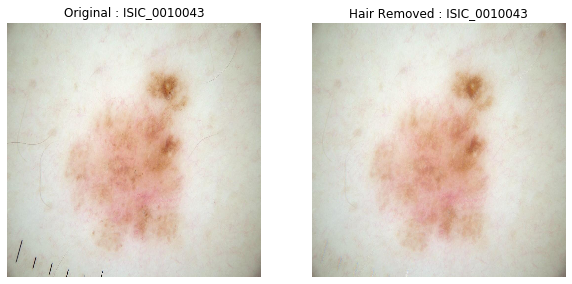

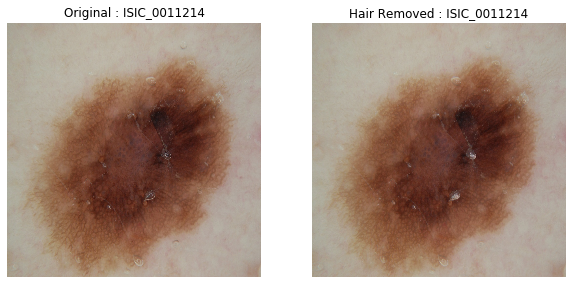

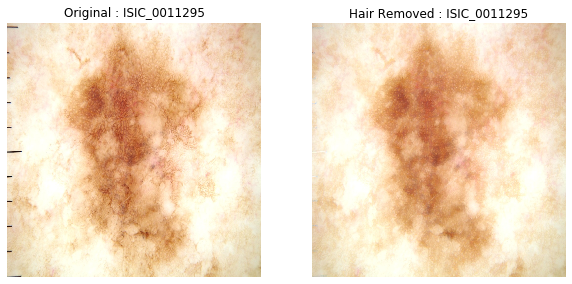

In [8]:
for i,image_name in enumerate(without_hair_images):
    
    fig = plt.figure(figsize=(10,5))
    
    image = cv2.imread(BASE_PATH + '/jpeg/train/' + image_name + '.jpg')
    image_resize = cv2.resize(image,(1024,1024))
    plt.subplot(1, 2, 1)
    plt.imshow(cv2.cvtColor(image_resize, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Original : '+ image_name)
    
    final_image = hair_remove(image_resize)
    plt.subplot(1, 2, 2)
    plt.imshow(cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title('Hair Removed : '+ image_name)
    
    plt.plot()